In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('./netflix_titles.csv')
print(df.isnull().sum())
print(df.columns)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


C:\Users\shahzad\AppData\Local\Temp\ipykernel_11572\2673328979.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration'] = df_movies['duration'].str.replace(' min', '').astype(int)


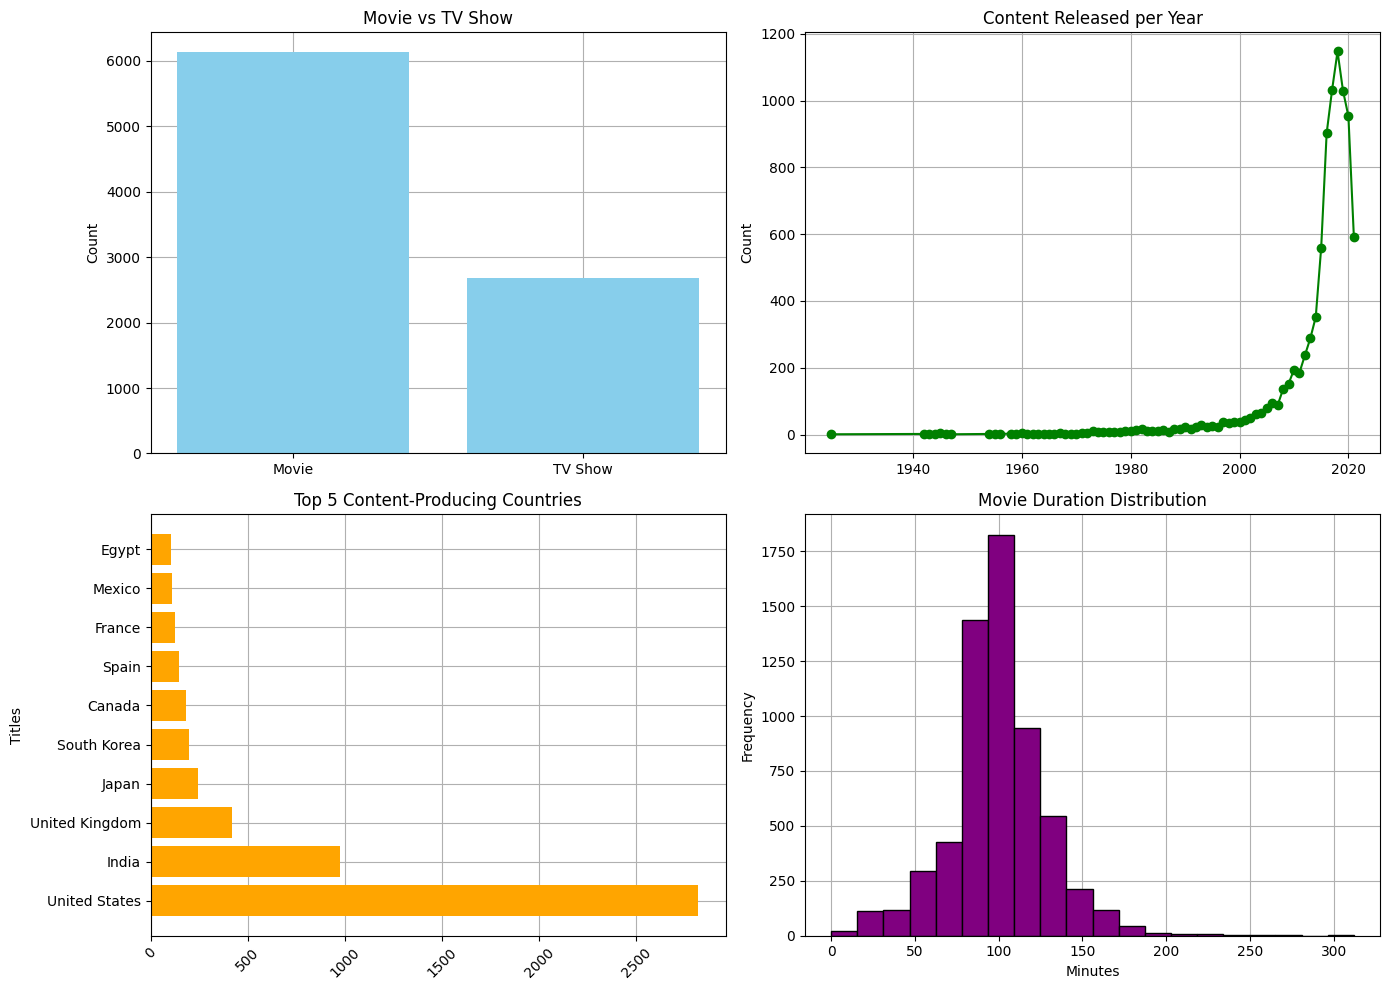

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("netflix_titles.csv")

# Data preparation
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month_added'] = df['date_added'].dt.to_period('M')
df['duration'] = df['duration'].fillna("0 min")

# Filter for movies to convert duration
df_movies = df[df['type'] == 'Movie']
df_movies['duration'] = df_movies['duration'].str.replace(' min', '').astype(int)

# Create the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns
for ax in axs.flat:
    ax.grid(True)
    ax.set_axisbelow(True)

# --- 1. Type Count ---
type_counts = df['type'].value_counts()
axs[0, 0].bar(type_counts.index, type_counts.values, color='skyblue')
axs[0, 0].set_title("Movie vs TV Show")
axs[0, 0].set_ylabel("Count")
axs[0, 0].grid(True)

# --- 2. Release Year Trend ---
release_trend = df['release_year'].value_counts().sort_index()
axs[0, 1].plot(release_trend.index, release_trend.values, marker='o', color='green')
axs[0, 1].set_title("Content Released per Year")
axs[0, 1].set_ylabel("Count")
axs[0, 1].grid(True)

# --- 3. Top 5 Countries ---
top_countries = df['country'].value_counts().head(10)
axs[1, 0].barh(top_countries.index, top_countries.values, color='orange')
axs[1, 0].set_title("Top 5 Content-Producing Countries")
axs[1, 0].set_ylabel("Titles")
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].grid(True)

# --- 4. Movie Duration Histogram ---
axs[1, 1].hist(df_movies['duration'], bins=20, color='purple', edgecolor='black')
axs[1, 1].set_title("Movie Duration Distribution")
axs[1, 1].set_xlabel("Minutes")
axs[1, 1].set_ylabel("Frequency")
axs[1, 1].grid(True)

# Final layout adjustment
plt.tight_layout()
plt.savefig('netflix.png',dpi=300,bbox_inches='tight')
plt.show()
